# Analyzing IMDB Data in Keras

In [58]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## 1. Loading the data

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.[1 https://keras.io/datasets/]

##### Observation: 

num_words: integer or None. Top most frequent words to consider. Any less frequent word will appear as oov_char value in the sequence data.
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000) # the most 1000 relevant words

print(x_train.shape)
print(x_test.shape)

print(x_train[:1]) # first review

(25000,)
(25000,)
[ [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]]


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(len(x_train[0]))  # words for the first review (Bag-of-words)
print(len(x_train[1]))  # words for the second review (Bag-of-words)

print(y_train[0])  # label for the first review
print(y_train[1])  # label for the second review

218
189
1
0


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

print(len(x_train[0])) # after the one-hot encoding the length of the first review
print(len(x_train[1])) # after the one-hot encoding the length of the second review

1000
1000


In [5]:
x_train.shape

(25000, 1000)

And we'll also one-hot encode the output.

In [6]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


In [8]:
print(y_train[0])  # label for the first review after one-hot encoding
print(y_train[1])  # label for the second review after one-hot encoding 

[ 0.  1.]
[ 1.  0.]


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [88]:
# Build the model architecture
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(1000,)))
model.add(Dropout(.6))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation="sigmoid"))

# Compile the model using a loss function and an optimizer

# Binary classification


RMSprop = optimizers.SGD(lr=0.002)
model.compile(loss='binary_crossentropy', optimizer=RMSprop, metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 128)               128128    
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 2)                 130       
Total params: 136,514
Trainable params: 136,514
Non-trainable params: 0
_________________________________________________________________


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [89]:
# Run the model

history = model.fit(x_train, y_train, batch_size=32, epochs=60, validation_data=(x_test, y_test), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/60
 - 12s - loss: 0.7145 - acc: 0.5078 - val_loss: 0.6896 - val_acc: 0.5381
Epoch 2/60
 - 10s - loss: 0.7008 - acc: 0.5222 - val_loss: 0.6827 - val_acc: 0.5741
Epoch 3/60
 - 14s - loss: 0.6916 - acc: 0.5371 - val_loss: 0.6760 - val_acc: 0.6072
Epoch 4/60
 - 10s - loss: 0.6820 - acc: 0.5606 - val_loss: 0.6679 - val_acc: 0.6398
Epoch 5/60
 - 11s - loss: 0.6748 - acc: 0.5779 - val_loss: 0.6574 - val_acc: 0.6714
Epoch 6/60
 - 10s - loss: 0.6652 - acc: 0.5964 - val_loss: 0.6438 - val_acc: 0.6982
Epoch 7/60
 - 10s - loss: 0.6534 - acc: 0.6151 - val_loss: 0.6264 - val_acc: 0.7221
Epoch 8/60
 - 10s - loss: 0.6393 - acc: 0.6400 - val_loss: 0.6057 - val_acc: 0.7367
Epoch 9/60
 - 9s - loss: 0.6221 - acc: 0.6596 - val_loss: 0.5821 - val_acc: 0.7527
Epoch 10/60
 - 9s - loss: 0.6039 - acc: 0.6786 - val_loss: 0.5569 - val_acc: 0.7643
Epoch 11/60
 - 12s - loss: 0.5857 - acc: 0.6929 - val_loss: 0.5345 - val_acc: 0.7735
Epoch 12/60
 - 14s - loss:

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [90]:
# Print all data saved in history dict
print(history.history.keys())

# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train)
print("\n Training Accuracy:", score[1]) 

score = model.evaluate(x_test, y_test)
print("\n Testing Accuracy:", score[1]) 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
25000/25000 [==============================] - 3s 110us/step

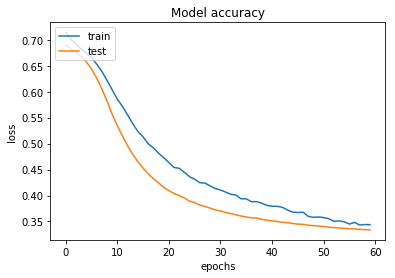

In [91]:
# plot results losses 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
# plt.xlim((0, 10))
# plt.ylim((0, 1))
plt.show()